# Flights in the United States

## by Eden Radovich

## Exploratory Analysis

This analysis explores a dataset containing over 21 million flight paths from the years of 2006 to 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [206]:
#read in data
flights_06 = pd.read_csv('2006.csv')
flights_07 = pd.read_csv('2007.csv')
flights_08 = pd.read_csv('2008.csv')

In [207]:
#combine three years of data into one dataframe
flights = pd.concat([flights_06,flights_07,flights_08],ignore_index = True)

In [208]:
print(flights.shape)
flights.head(3)

(21604865, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### Structure

There are 21,604,865 flights in the dataset with 29 features:

    -Year	2006-2008
    -Month	1-12
    -DayofMonth	1-31
    -DayOfWeek	1 (Monday) - 7 (Sunday)
    -DepTime	actual departure time (local, hhmm)
    -CRSDepTime	scheduled departure time (local, hhmm)
    -ArrTime	actual arrival time (local, hhmm)
    -CRSArrTime	scheduled arrival time (local, hhmm)
    -UniqueCarrier	unique carrer (airline) code
    -FlightNum	flight number
    -TailNum	plane tail number
    -ActualElapsedTime	in minutes
    -CRSElapsedTime	in minutes
    -AirTime	in minutes
    -ArrDelay	arrival delay, in minutes
    -DepDelay	departure delay, in minutes
    -Origin	origin IATA airport code
    -Dest	destination IATA airport code
    -Distance	in miles
    -TaxiIn	taxi in time, in minutes
    -TaxiOut	taxi out time in minutes
    -Cancelled	was the flight cancelled?
    -CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
    -Diverted	1 = yes, 0 = no
    -CarrierDelay	in minutes
    -WeatherDelay	in minutes
    -NASDelay	in minutes
    -SecurityDelay	in minutes
    -LateAircraftDelay	in minutes

### Main topic of interest

Do delayed flights tend to occur in the same areas or same flight paths?

## Data Cleaning

In [5]:
#check info
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604865 entries, 0 to 21604864
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 4.7+ GB


In [209]:
#check for duplicates
flights.duplicated().sum()

38

In [210]:
#drop duplicates
flights.drop_duplicates(inplace=True)

In [38]:
#check that changes were reflected
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21604827 entries, 0 to 21604864
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 4.8+ GB


In [211]:
#drop irrelevant or unnecessary columns
flights = flights.drop(['TailNum','TaxiIn','TaxiOut','CancellationCode','Diverted'],axis=1)

In [212]:
#fix datatypes of year, month, day of month, and day of week
flights['Year'] = flights['Year'].astype('category')
flights['Month'] = flights['Month'].astype('category')
flights['DayofMonth'] = flights['DayofMonth'].astype('category')
flights['DayOfWeek'] = flights['DayOfWeek'].astype('category')

In [213]:
#drop any null values
flights.dropna(inplace=True)

In [214]:
#the data set now contains 15,803,790 flights with non-null values
flights.shape

(15803790, 24)

In [215]:
#correcting data types
flights['DepTime'] = flights['DepTime'].astype('int64')
flights['ArrTime'] = flights['ArrTime'].astype('int64')
flights['ActualElapsedTime'] = flights['ActualElapsedTime'].astype('int64')
flights['CRSElapsedTime'] = flights['CRSElapsedTime'].astype('int64')
flights['AirTime'] = flights['AirTime'].astype('int64')
flights['ArrDelay'] = flights['ArrDelay'].astype('int64')
flights['DepDelay'] = flights['DepDelay'].astype('int64')
flights['CarrierDelay'] = flights['CarrierDelay'].astype('int64')
flights['WeatherDelay'] = flights['WeatherDelay'].astype('int64')
flights['NASDelay'] = flights['NASDelay'].astype('int64')
flights['SecurityDelay'] = flights['SecurityDelay'].astype('int64')
flights['LateAircraftDelay'] = flights['LateAircraftDelay'].astype('int64')

In [216]:
carriers = pd.read_csv('carriers.csv')
carriers.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [217]:
carriers = carriers.rename(columns = {'Code':'UniqueCarrier'})

In [218]:
flights = pd.merge(flights, carriers, on ='UniqueCarrier',how='left')
flights.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description
0,2006,1,11,3,743,745,1024,1018,US,343,...,ATL,PHX,1587,0,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,ATL,PHX,1587,0,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,ATL,PHX,1587,0,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...


## Univariate Exploration

In [225]:
#creating a column for flight path
flights['FlightPath'] = flights['Origin'].str.cat(flights['Dest'], sep=" > ")

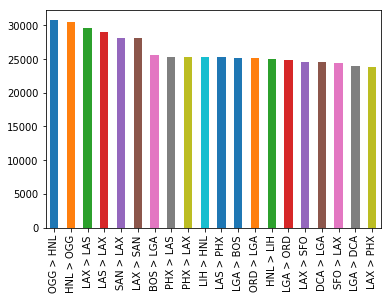

In [156]:
#top 20 flight paths
flights['FlightPath'].value_counts().head(20).plot(kind='bar');

Of the top 20 most popular flight paths, the number of flights is relatively consistent around 25,000 to 30,000 flights. Next I will examine which flight paths experience the most delays.

In [226]:
#I am interested in only significant delays that affected both departure and arrival time. 
delayed = flights.query('DepDelay > 15 and ArrDelay > 15')

In [227]:
delayed.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description,FlightPath
14,2006,1,11,3,1752,1540,1923,1654,US,127,...,PHL,196,0,0,0,149,0,0,US Airways Inc. (Merged with America West 9/05...,BDL > PHL
31,2006,1,11,3,1851,1835,2116,2100,US,882,...,CLT,728,0,0,0,0,0,16,US Airways Inc. (Merged with America West 9/05...,BOS > CLT
48,2006,1,11,3,1905,1845,2104,2027,US,2047,...,DCA,399,0,14,0,17,0,6,US Airways Inc. (Merged with America West 9/05...,BOS > DCA


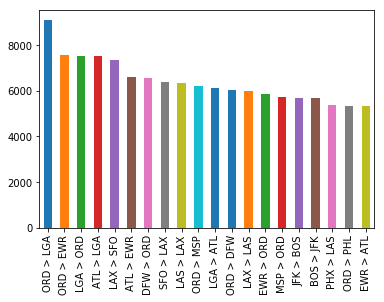

In [228]:
delayed['FlightPath'].value_counts().head(20).plot(kind='bar');

Of the flights paths that were more than 15 min delayed, it apears that the ORD > LGA (Chicago to LaGuardia) flight path experiences delays subsantially more frequently than the others.

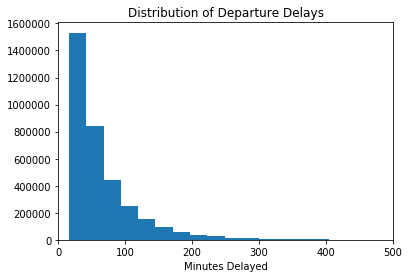

In [340]:
plt.hist(data=delayed,x='DepDelay',bins=100);
plt.xlim(0,500)
plt.title('Distribution of Departure Delays')
plt.xlabel('Minutes Delayed');

As expected, the distribution of delays is highly skewed to the right given that we are dealing with time and there are only so many minutes a flight can be delayed.

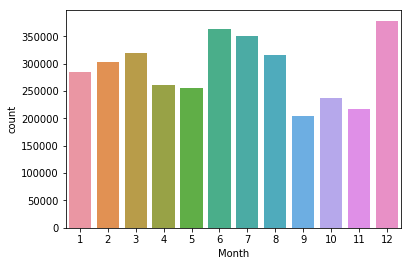

In [193]:
sb.countplot(data=delayed,x='Month');

Of the delayed flights over 15 min, not suprisingly, December is the highest month, which could be correlated to winter weather. However, June is suprisingly high as well, which might suggest that the popularity of summer and winter vacation travel affects delays.

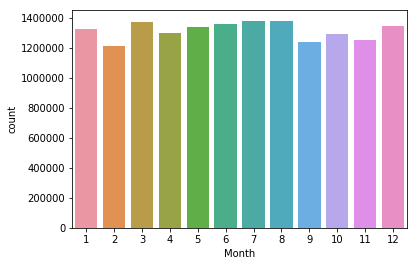

In [194]:
sb.countplot(data=flights, x='Month');

Looking at all flights, the distribution of flights are relatively consistent, suggesting that airlines might not change flight paths relative to popularity of travel, which might be affecting delays in months where travel is higher. While December weather might affect delays, later I will dig deeper to see why June is also high.

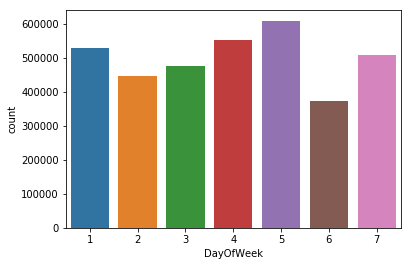

In [195]:
#1 = Monday, 7 = Sunday
sb.countplot(data=delayed, x='DayOfWeek');

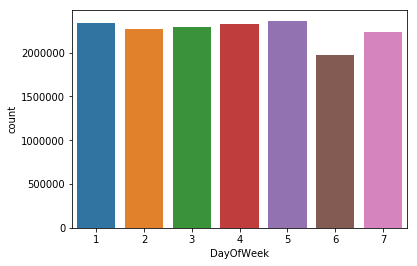

In [196]:
sb.countplot(data=flights, x='DayOfWeek');

While Friday appears to be the worst day for delays, it is not, however, substantially greater in terms of number of flights. Again, this might suggest that flight paths are consistent per day, per month, etc. regardless of popularity of travel. 

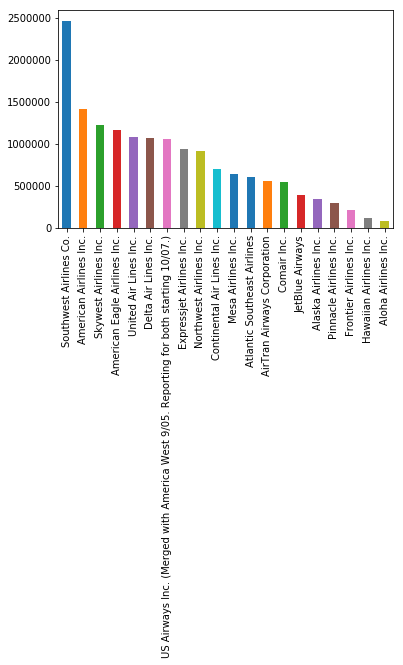

In [202]:
flights['Description'].value_counts().head(20).plot(kind='bar');

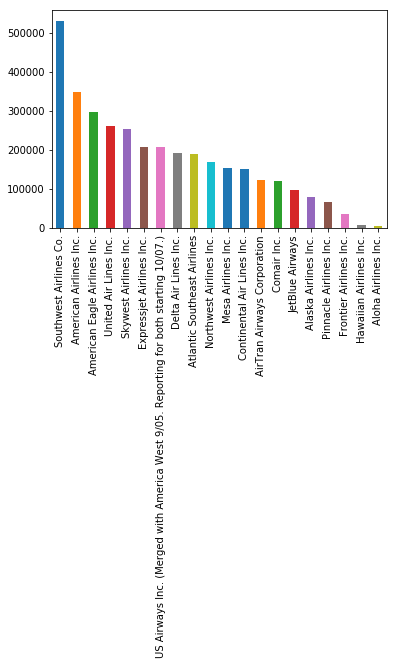

In [221]:
delayed['Description'].value_counts().head(20).plot(kind='bar');

SouthWest Airlines appears to have significantly more flights than the other airlines, which is why it appears to have more delays than the others.

## Bivariate Exploration

### Minutes Delayed by Flight Path

In [300]:
#Top 10 Flight Paths by number of flights
top_10_flights = list(flights['FlightPath'].value_counts().head(10).to_dict().keys())

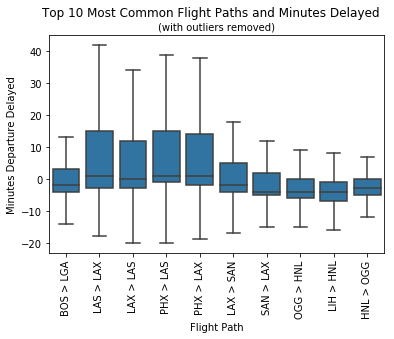

In [305]:
base_color = sb.color_palette()[0]
sb.boxplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', 
           color=base_color,showfliers=False)
plt.xlabel('Flight Path')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Top 10 Most Common Flight Paths and Minutes Delayed')
plt.xticks(rotation=90);

NOTE: Negative minutes means early departure. 

Of the Top 10 Most Common Flight Paths, LAS > LAX, PHX > LAS, and PHX > LAX have the highest median departure delay.

In [307]:
#median departure delays of top 10 most common flights
flights[flights['FlightPath'].isin(top_10_flights)].groupby('FlightPath')['DepDelay'].median()

FlightPath
BOS > LGA   -2
HNL > OGG   -3
LAS > LAX    1
LAX > LAS    0
LAX > SAN   -2
LIH > HNL   -4
OGG > HNL   -4
PHX > LAS    1
PHX > LAX    1
SAN > LAX   -4
Name: DepDelay, dtype: int64

### Minutes Delayed by Month

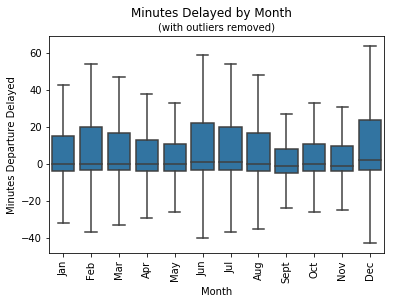

In [327]:
base_color = sb.color_palette()[0]
tick_labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
g = sb.boxplot(data = flights, x = 'Month', y = 'DepDelay', 
           color=base_color, showfliers=False)
plt.xlabel('Month')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Minutes Delayed by Month')
plt.xticks(rotation=90,label = tick_labels)
g.set(xticklabels=tick_labels);

While it appears that flight delays across months have a median departure delay around 0 minutes, the months that experience the most variability in delays appear to be June and December. 

### Minutes Delayed by Day of the Week

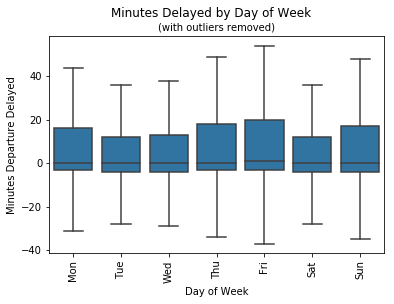

In [328]:
base_color = sb.color_palette()[0]
tick_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sb.boxplot(data = flights, x = 'DayOfWeek', y = 'DepDelay', 
           color=base_color, showfliers=False)
plt.xlabel('Day of Week')
plt.ylabel('Minutes Departure Delayed')
plt.title('(with outliers removed)',fontsize=10)
plt.suptitle('Minutes Delayed by Day of Week')
plt.xticks(rotation=90,label = tick_labels)
g.set(xticklabels=tick_labels);

Again, the median departure delay by Day of Week hovers around 0 minutes delayed. The most variability occurs on Thursday and Friday.

## Bivariate Summary

When looking across various metrics such as Flight Path, Month, and Day of Week, the median minutes delayed hovered around 0 minutes delayed. However, especially among Month and Day of Week, the variability of delays was much higher in June and December and Thursday and Friday. This could suggest that Seasonal and Weekend travel (i.e. more travelers) has an effect on the timliness of flights.

## Multivariate Exploration

/Users/edenradovich/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


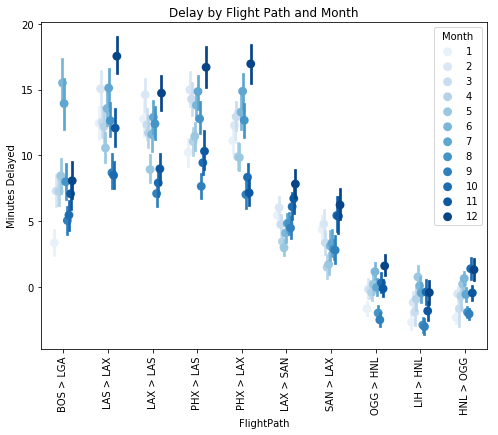

In [336]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', hue = 'Month',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Delay by Flight Path and Month')
plt.ylabel('Minutes Delayed')
plt.xticks(rotation=90)
plt.show();

Within the majority of each flight path, the highest delays occur in December, (except for BOS > LGA and LIH > HNL where May/June experience most delays). This reaffirms my hypothesis that delays correlate with seasonal travel.

/Users/edenradovich/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


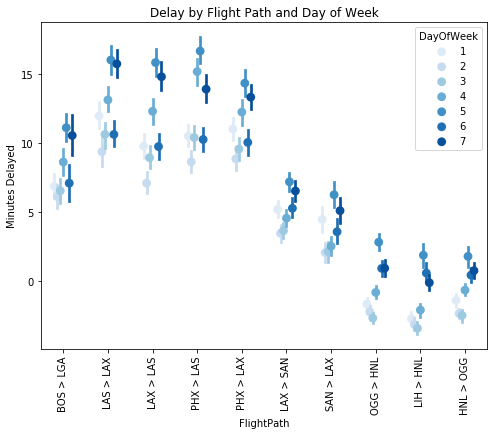

In [338]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = flights[flights['FlightPath'].isin(top_10_flights)], x = 'FlightPath', y = 'DepDelay', hue = 'DayOfWeek',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Delay by Flight Path and Day of Week')
plt.ylabel('Minutes Delayed')
plt.xticks(rotation=90)
plt.show();

NOTE: 1 = Monday, 7 = Sunday

The general trend here shows that more delays occur as they approach the weekend, i.e. when more people are likely traveling. Friday (5) appears to be the highest day for delays.

## Multivariate Summary

The multivariate plots of Delays by Flight Path and Month and Flight Path and Day of Week affirm that times when there are more travelers (i.e. Summer and Winter, and Weekends), is when flights experience the highest delays. I imagine this is due to overbooking of flights or other traveler-related issues affecting on-time departures.

In [339]:
flights.to_csv('flights_clean.csv')